### nh9_to_array()

NH9形式のHS画像をnp.arrayとして読み込む

In [68]:
import numpy as np
from hsitools.convert import nh9_to_array


hsi_path = '../sample/sample_hsi.nh9'

hsi_array = nh9_to_array(hsi_path)

print(hsi_array.shape)

(1080, 2048, 151)


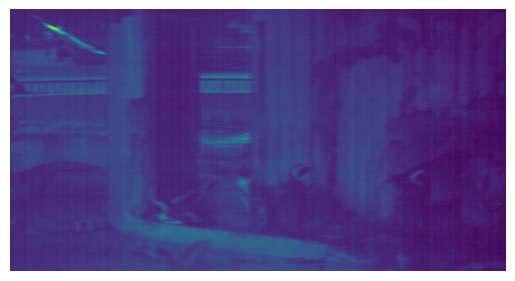

In [69]:
import matplotlib.pyplot as plt

img = hsi_array[:, :, 10] / 4095
from scipy.ndimage import uniform_filter1d

# 横方向に平滑化フィルタを適用する
smoothed_img = uniform_filter1d(img, size=10, axis=1)

plt.axis('off')
plt.imshow(smoothed_img)

### hs_to_rgb()
np.arrayのHS画像をRGB画像に変換する

255
55


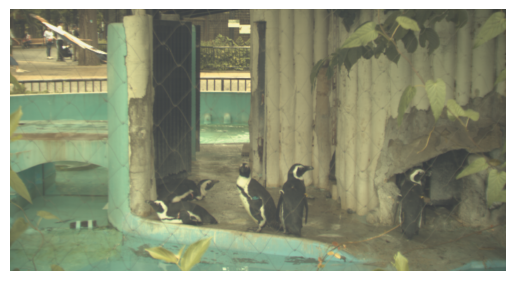

In [70]:
import matplotlib.pyplot as plt

from hsitools.convert import hs_to_rgb, gamma_correction

hsi_array = hsi_array / 4095
rgb_img = hs_to_rgb(hsi_array)
rgb_img = gamma_correction(rgb_img, gamma=2.2, max_value=np.max(rgb_img), base_max_value=255)
print(np.max(rgb_img))
print(np.min(rgb_img))

plt.axis('off')
plt.imshow(rgb_img)

### gamma_correction()
RGB画像に対してガンマ補正を適用

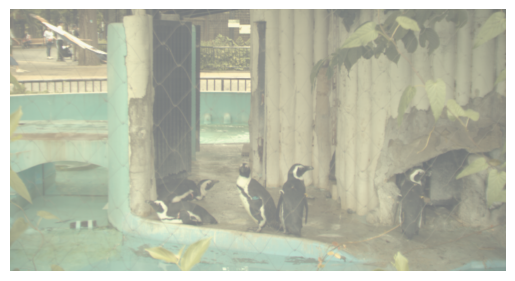

In [71]:
from hsitools.convert import gamma_correction

rgb_img_gamma  = gamma_correction(rgb_img, gamma=1.9, max_value=255)

plt.axis('off')
plt.imshow(rgb_img_gamma)

### extract_pixels_from_hsi()
HS画像から指定した範囲の画素を取り出す

In [72]:
from hsitools.convert import extract_pixels_from_hsi

extract_area = np.array((100, 100, 200, 200))
hs_pixels = extract_pixels_from_hsi(hsi_array, extract_area)

print(hs_pixels.shape)

(10000, 151)


### extract_pixels_from_hsi_mask()
HS画像からマスク画像が255の範囲の画素を取り出す

In [73]:
from hsitools.convert import extract_pixels_from_hsi_mask

extract_mask_img = np.zeros((hsi_array.shape[0], hsi_array.shape[1]))
extract_mask_img[100:200, 100:200] = 255

hs_pixels = extract_pixels_from_hsi_mask(hsi_array, extract_mask_img)

print(hs_pixels.shape)

(10000, 151)
